<a href="https://colab.research.google.com/github/unVeroz007/DIF62130_KELAS-B_25_2311532008/blob/main/Praktikum5/Dimentionality_Reduction_Praktikum_ML_17_Juni_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from sklearn.datasets import load_iris #mengambil dataset bunga iris yang sudah tersedia di scikit-learn. Dataset ini berisi data pengukuran 150 bunga iris dari 3 spesies berbeda.

iris = load_iris()
x = iris['data']
y = iris['target']

n_samples, n_features = X.shape

print(f'Number of samples: {n_samples}')
print(f'Number of features: {n_features}')


Number of samples: 150
Number of features: 4


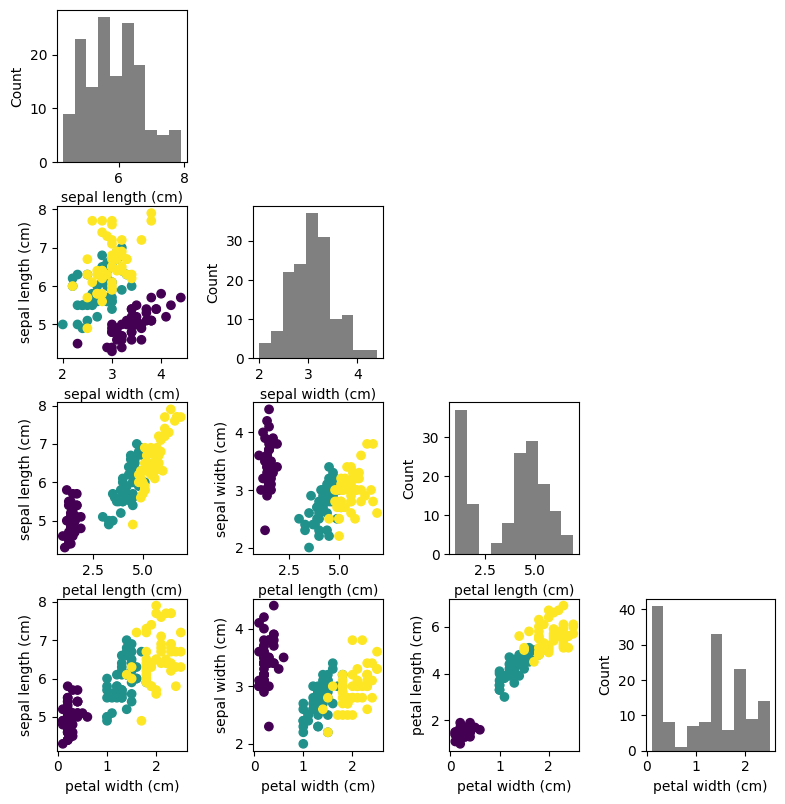

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=n_features, ncols=n_features, figsize= (8, 8))
fig.tight_layout()

names = iris.feature_names

for i, j in zip (*np.triu_indices(n_features, k=1)):
    ax[j, i].scatter(x[:, j], x[:, i], c = y)
    ax[j, i].set_xlabel(names[j])
    ax[j, i].set_ylabel(names[i])
    ax[i, j].set_axis_off()

for i in range(n_features):
  ax[i, i].hist(x[:, i], color = 'grey')
  ax[i, i].set_ylabel('Count')
  ax[i, i].set_xlabel(names[i])

In [24]:
import numpy as np

def mean(x):
  return np.mean(x, axis=0) # Calculate mean for each feature

def std(x):
  return np.std(x, axis=0) # Calculate standard deviation for each feature

def Standardize(x):
  return (x - mean(x)) / std(x)

X_std = Standardize(x) # Calculate the standardized data

#2. Hitung covariance matrix

In [27]:
import numpy as np

def covariance(x):
  # Calculate the covariance matrix
  # Divide by n_samples - 1 for sample covariance
  return (x.T @ x) / (x.shape[0] - 1)

cov_mat = covariance(X_std) # Calculate the covariance matrix

In [28]:
display(cov_mat) # Display the covariance matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

#3 Hitung eigenvectors dan eigenvalues dari covariance matrix


In [32]:
from numpy.linalg import eig

# Eigendecomposition of covariance matrix
eig_vals, eig_vecs = eig(cov_mat)

# Adjusting the eigenvectors (loadings) that are largest in absolute value to be positive
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)

signs = np.sign(eig_vecs [max_abs_idx, range(eig_vecs.shape[0])])

eig_vecs = eig_vecs*signs [np.newaxis,:]

eig_vecs = eig_vecs.T

print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n',eig_vecs)

Eigenvalues 
 [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors 
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


#langkah 4 - urutkan eigenvectors dan eigenvalues

In [38]:
# We first make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]

# Then, we sort the tuples from the highest to the lowest based on eigenvalues magnitude
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# For further usage
eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

print(eig_pairs)

[(np.float64(2.9380850501999918), array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])), (np.float64(0.920164904162487), array([0.37741762, 0.92329566, 0.02449161, 0.06694199])), (np.float64(0.14774182104494785), array([ 0.71956635, -0.24438178, -0.14212637, -0.63427274])), (np.float64(0.020853862176462023), array([-0.26128628,  0.12350962,  0.80144925, -0.52359713]))]


#langkah 5 - Pilih principal components (PC)
pilih k eigenvektor pertama dimana k adalah jumlah dimensi subruang fitur baru

Perhatikan bahwa nilai k dapat diatur dengan cara yang lebih bijak melalui varians yang dijelaskan (explained variance) Explained variance memberi tahu kita seberapa banyak informasi (variance) yang dapat dikaitkan dengan masing-masing komponen utama (principal components).

In [39]:
#select top k eigenvecctors
k = 2
W = eig_vecs_sorted[:k, :]

print(W.shape)

(2, 4)


Explained variance: [72.96 22.85  3.67  0.52]
Cumulative explained variance: [ 72.96  95.81  99.48 100.  ]


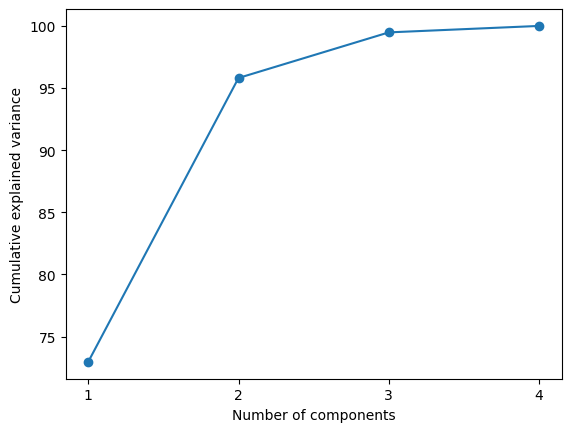

In [42]:
eig_vals_total = sum(eig_vals)
explained_variance = [(i / eig_vals_total) * 100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

plt.plot(np.arange(1, n_features + 1), cum_explained_variance, 'o-')
plt.xticks(np.arange(1, n_features + 1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()

#Langkah 6 - proyeksikan data

disini kita visualisasikan data yang akan ditranformasikan dalam ruang PCA dari dua PC pertama (PC1 dan PC2)

In [46]:
X_proj = X_std.dot(W.T)

print(X_proj.shape)
print(X.shape)

(150, 2)
(150, 4)


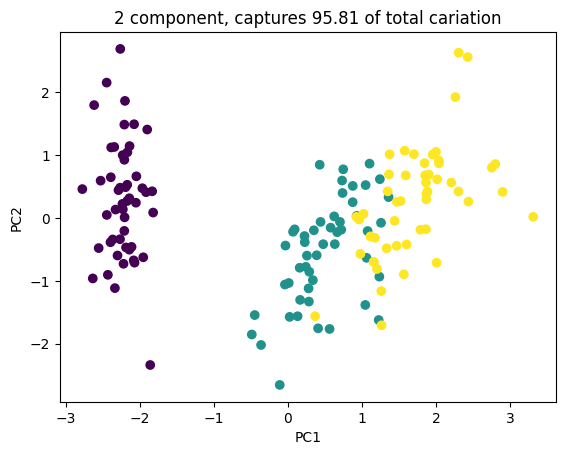

In [51]:
plt.scatter(X_proj[:, 0], X_proj[:, 1], c = y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2 component, captures {} of total cariation'.format(cum_explained_variance[1]))
plt.show()

#PCA dengan sklearn